In [1]:
#Importação das bibliotecas necessárias para toda a atividade
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal as signal
import soundfile as sf
import sounddevice as sd
import IPython.display as ipd

In [2]:
#Importação dos arquivos do áudio anecóico e da resposta ao impulso
anec, fs_anec = sf.read('Viola, Grieg, Peer Gynt.wav')
ht, fs_ht = sf.read('ht.wav')
ht_l = ht[:,0]
ht_r = ht[:,1]

print('O sinal anecóico possui '+ str(len(anec)) +' amostras')
print('A resposta ao impulso possui '+ str(ht.shape[0]) +' amostras')

O sinal anecóico possui 908316 amostras
A resposta ao impulso possui 44924 amostras


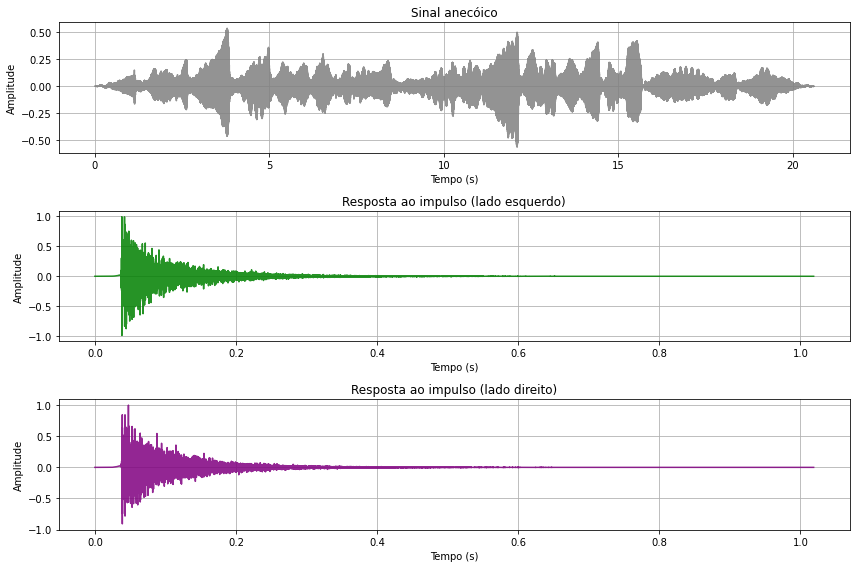

0.999969482421875

In [25]:
#Gráfico dos sinais no tempo

#vetores temporais dos sinais
t_anec = np.linspace(0,(len(anec)-1)/fs_anec,len(anec))
t_ht = np.linspace(0,(ht.shape[0]-1)/fs_ht,ht.shape[0])

plt.figure(figsize = (12,8), tight_layout='true')

plt.subplot(3,1,1)
plt.title('Sinal anecóico')
plt.plot(t_anec, anec, label = 'Sinal anecóico', color = 'grey', alpha=0.85)
plt.grid()
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')

plt.subplot(3,1,2)
plt.title('Resposta ao impulso (lado esquerdo)')
plt.plot(t_ht, ht_l, label = 'Lado esquerdo', color = 'green', alpha=0.85)
plt.grid()
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')

plt.subplot(3,1,3)
plt.title('Resposta ao impulso (lado direito)')
plt.plot(t_ht, ht_r, label = 'Lado direito', color = 'purple', alpha=0.85)

plt.grid()
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')

plt.show()

In [4]:
#Convolução entre os sinais
conv_l = signal.convolve(anec,ht_l)
conv_r = signal.convolve(anec,ht_r)

t_conv = np.linspace(0,(len(conv_l)/fs_anec),len(conv_l))
print('Os sinais convoluidos possuem '+ str(len(conv_l)) +' amostras')

Os sinais convoluidos possuem 953239 amostras


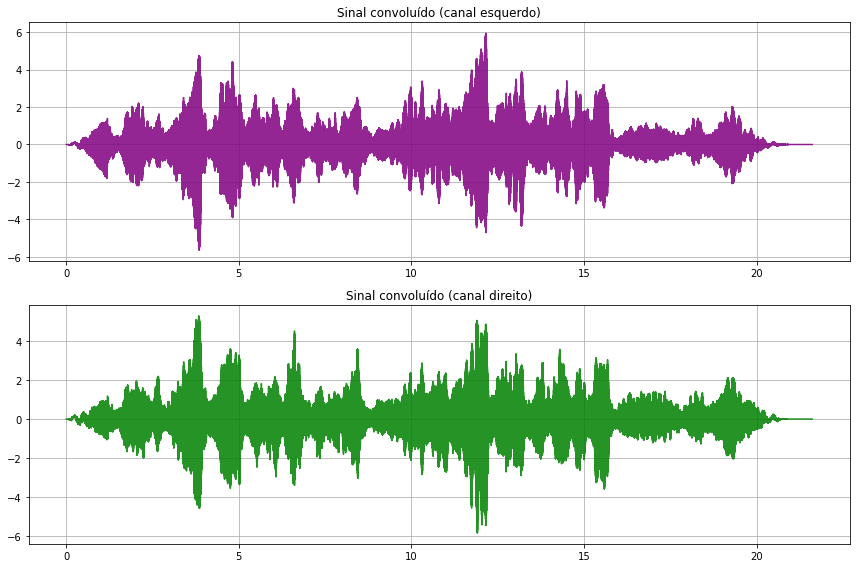

In [27]:
#Gráfico dos sinais convoluidos.
plt.figure(figsize=(12,8), tight_layout='true')

plt.subplot(2,1,1)
plt.title('Sinal convoluído (canal esquerdo)')
plt.grid()
plt.plot(t_conv,conv_l, color = 'purple', alpha=0.85)

plt.subplot(2,1,2)
plt.title('Sinal convoluído (canal direito)')
plt.grid()
plt.plot(t_conv,conv_r, color='green', alpha=0.85)

In [26]:
#Display do áudio dos sinais

print('Sinal anecóico')
ipd.display(ipd.Audio(anec,rate = fs_anec))
print('Sinal convoluído')
ipd.display(ipd.Audio([conv_l,conv_r],rate=fs_ht))

Sinal anecóico


Sinal convoluído
